In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.densenet import DenseNet121

#Import from notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [4]:
!pip install import-ipynb

In [5]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Using TensorFlow backend.


unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


#Extractor (DenseNet)

In [0]:
extractor_dense = DenseNet121(weights='imagenet' , input_shape=(256,256,3) , include_top = False)
extractor_dense.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])

In [7]:
extractor_dense.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

#Train Classifiers

##Binary Classifier

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' , input_dim = 1024 ))
  binary_class.add(keras.layers.Dense(units=256 , activation = 'relu'))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-5),metrics=['acc'])
  return binary_class

## test classifiers

###test 1

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 0.4313 - acc: 0.7970
Epoch 00001: val_acc improved from -inf to 0.67257, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 18ms/step - loss: 0.4330 - acc: 0.7955 - val_loss: 0.5803 - val_acc: 0.6726
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4739 - acc: 0.7929
Epoch 00002: val_acc improved from 0.67257 to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4545 - acc: 0.7955 - val_loss: 0.4295 - val_acc: 0.8053
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.3594 - acc: 0.8307
Epoch 00003: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.3559 - acc: 0.

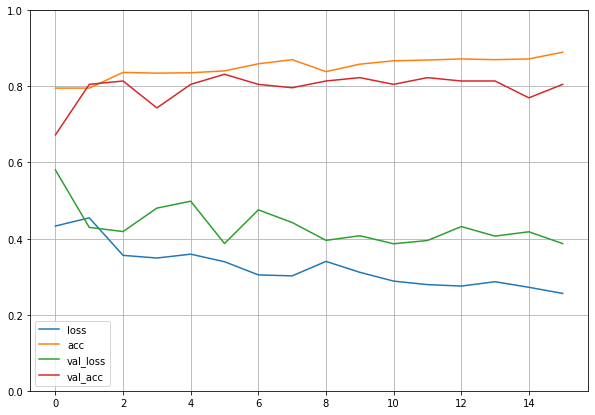

In [13]:
# neurons 512 then 256 and no dropouts
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [14]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4683 - acc: 0.8417


[0.4683036804199219, 0.8416666388511658]

###test 2

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 1.4410 - acc: 0.7122
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 25ms/step - loss: 1.3826 - acc: 0.7168 - val_loss: 1.1044 - val_acc: 0.8053
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 0.9553 - acc: 0.7437
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.9469 - acc: 0.7365 - val_loss: 0.5596 - val_acc: 0.7876
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 0.7345 - acc: 0.7512
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.7397 - acc: 0.7502 - val_loss: 0.5157 - val_acc: 0.8053
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 0.6655 - acc: 0.7463
Epoch 00004: val_acc did not improve from 0.80531

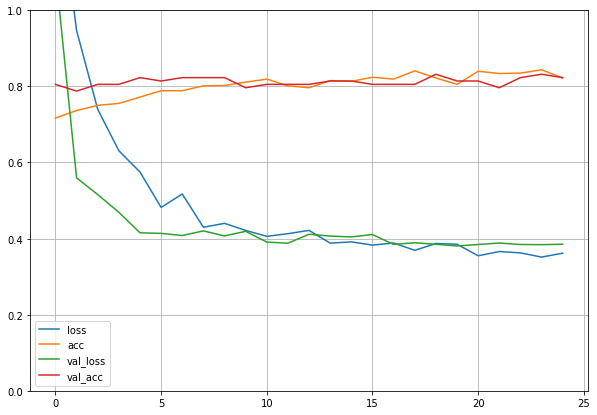

In [18]:
# neurons 512 then 256 and dropouts
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [19]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 5ms/step - loss: 0.5052 - acc: 0.8417


[0.5052011013031006, 0.8416666388511658]

###test 3

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.4339 - acc: 0.7089
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 29ms/step - loss: 1.4339 - acc: 0.7089 - val_loss: 0.8327 - val_acc: 0.8053
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 0.9554 - acc: 0.7225
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.9420 - acc: 0.7316 - val_loss: 0.7469 - val_acc: 0.8053
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.7223 - acc: 0.7520
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.7246 - acc: 0.7483 - val_loss: 0.4697 - val_acc: 0.8053
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.5780 - acc: 0.7740
Epoch 00004: val_acc did not improve from 0.80531

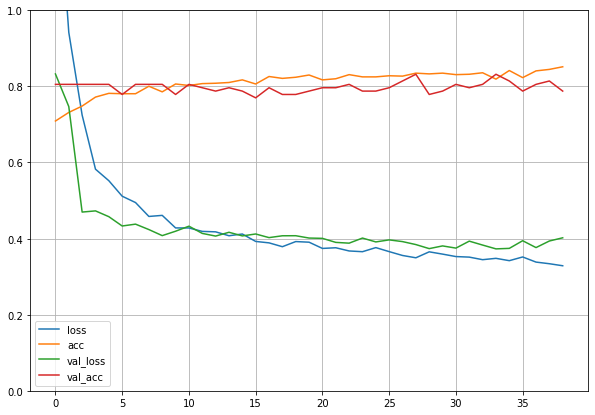

In [15]:
# neurons 512 then 256 and dropouts  lr_extractor = -2
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [16]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4784 - acc: 0.8000


[0.47835642099380493, 0.800000011920929]

###test 4

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 1.7838 - acc: 0.7000
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 27ms/step - loss: 1.8674 - acc: 0.7011 - val_loss: 1.1627 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 1.2882 - acc: 0.6903
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.2882 - acc: 0.6903 - val_loss: 1.0469 - val_acc: 0.8053
Epoch 3/50
39/51 [=====================>........] - ETA: 0s - loss: 1.3429 - acc: 0.6974
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.3268 - acc: 0.6991 - val_loss: 0.9962 - val_acc: 0.8053
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 1.1636 - acc: 0.7000
Epoch 00004: val_acc did not improve from 0.80531

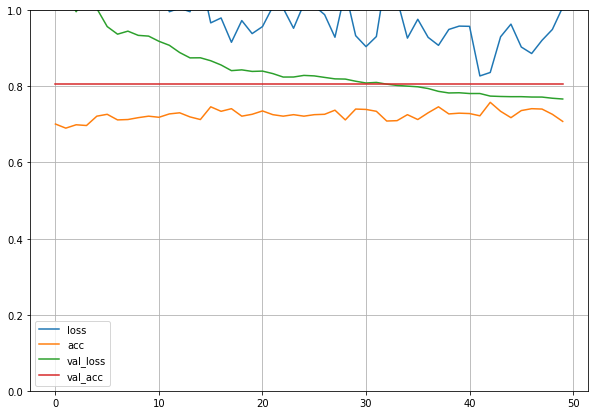

In [21]:
# neurons 512 then 256 and dropouts  lr_class = -4  , decay = 0.1
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [0]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4784 - acc: 0.8000


[0.47835642099380493, 0.800000011920929]

###test 5

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 4.3823 - acc: 0.7160
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 29ms/step - loss: 4.3196 - acc: 0.7168 - val_loss: 0.4649 - val_acc: 0.8053
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.5436 - acc: 0.7890
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.5430 - acc: 0.7906 - val_loss: 0.4915 - val_acc: 0.8053
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4898 - acc: 0.7940
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4714 - acc: 0.8024 - val_loss: 0.4607 - val_acc: 0.8053
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 0.4927 - acc: 0.7987
Epoch 00004: val_acc did not improve from 0.80531

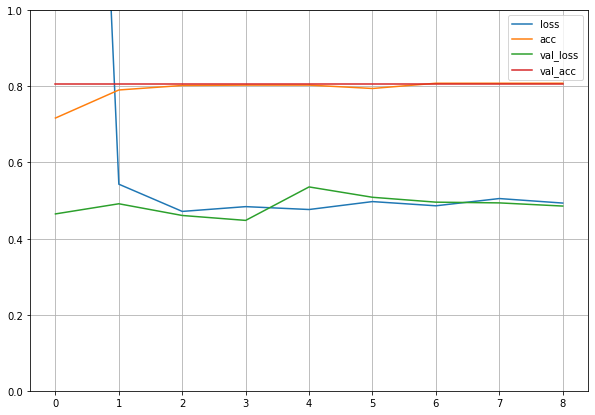

In [28]:
# neurons 512 then 256 and dropouts  lr_class = -2 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [29]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.5470 - acc: 0.7917


[0.5470077991485596, 0.7916666865348816]

###test 6

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 1.4169 - acc: 0.6824
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 27ms/step - loss: 1.4169 - acc: 0.6824 - val_loss: 0.7334 - val_acc: 0.8053
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 1.2647 - acc: 0.7138
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.3216 - acc: 0.7168 - val_loss: 0.8057 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.2616 - acc: 0.7306
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 6ms/step - loss: 1.2616 - acc: 0.7306 - val_loss: 0.6947 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 1.3356 - acc: 0.7109
Epoch 00004: val_acc did not improve from 0.80531

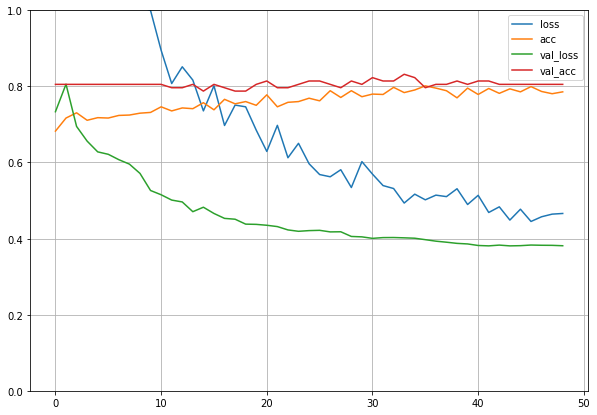

In [31]:
# neurons 512 then 256 and dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [32]:
processing.test_classifier(extractor_dense, bin_class ,processing.axial , processing.abnormal)

4/4 [==============================] - 0s 3ms/step - loss: 0.4635 - acc: 0.8250


[0.46351706981658936, 0.824999988079071]

###test 7

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 0.6318 - acc: 0.7128
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 30ms/step - loss: 0.6185 - acc: 0.7188 - val_loss: 0.4740 - val_acc: 0.8053
Epoch 2/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4516 - acc: 0.8012
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4419 - acc: 0.8073 - val_loss: 0.4458 - val_acc: 0.7965
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.4128 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4109 - acc: 0.8092 - val_loss: 0.4354 - val_acc: 0.8053
Epoch 4/50
43/51 [========================>.....] - ETA: 0s - loss: 0.3954 - acc: 0.8140
Epoch 00004: val_acc improved from 0.80531 to 0.8

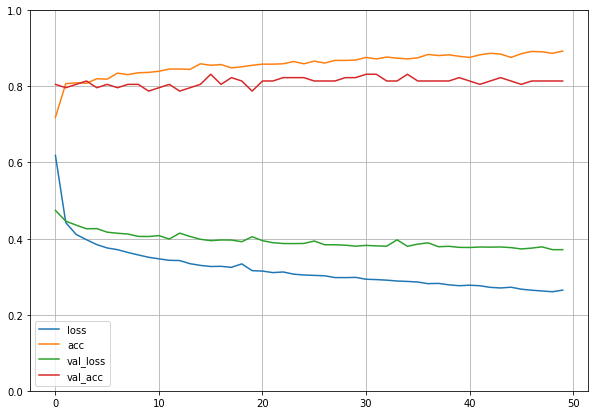

In [36]:
# neurons 512 then 256 and no dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [42]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 4ms/step - loss: 0.4184 - acc: 0.8250


[0.41843923926353455, 0.824999988079071]

###test 8

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 2.6025 - acc: 0.5587
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 9ms/step - loss: 2.6202 - acc: 0.5634 - val_loss: 0.7537 - val_acc: 0.8053
Epoch 2/50
38/51 [=====================>........] - ETA: 0s - loss: 2.0027 - acc: 0.6513
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 2.1028 - acc: 0.6460 - val_loss: 1.1099 - val_acc: 0.8053
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 1.8811 - acc: 0.6791
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.9065 - acc: 0.6834 - val_loss: 1.2238 - val_acc: 0.8053
Epoch 4/50
49/51 [===========================>..] - ETA: 0s - loss: 1.7043 - acc: 0.6969
Epoch 00004: val_acc did not improve from 0.80531


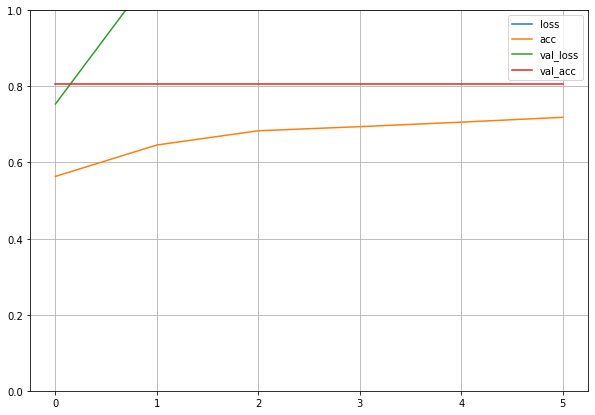

In [44]:
# neurons 256 then 128 and dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [45]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.8557 - acc: 0.7917


[0.8556826114654541, 0.7916666865348816]

###test 9

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 1.5888 - acc: 0.7092
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 15ms/step - loss: 1.5756 - acc: 0.7099 - val_loss: 0.6860 - val_acc: 0.8053
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 1.2283 - acc: 0.7191
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.2770 - acc: 0.7139 - val_loss: 0.6964 - val_acc: 0.8053
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 1.3332 - acc: 0.7082
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.3250 - acc: 0.7119 - val_loss: 0.5935 - val_acc: 0.8053
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 1.0160 - acc: 0.7552
Epoch 00004: val_acc did not improve from 0.80531

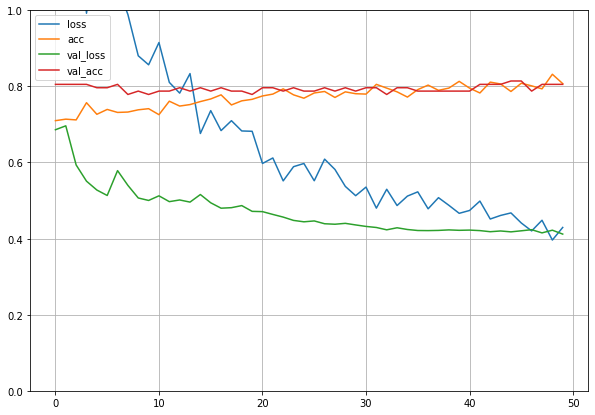

In [47]:
# neurons 1024 then 512 and dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [48]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 4ms/step - loss: 0.4767 - acc: 0.8167


[0.4767455756664276, 0.8166666626930237]

###test 10

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 11.1669 - acc: 0.6018
Epoch 00001: val_acc improved from -inf to 0.78761, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 16ms/step - loss: 11.1669 - acc: 0.6018 - val_loss: 10.6415 - val_acc: 0.7876
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 10.5528 - acc: 0.8024
Epoch 00002: val_acc did not improve from 0.78761
51/51 [==============================] - 0s 5ms/step - loss: 10.5528 - acc: 0.8024 - val_loss: 10.4375 - val_acc: 0.7788
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 10.3652 - acc: 0.8011
Epoch 00003: val_acc improved from 0.78761 to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 10.3586 - acc: 0.8004 - val_loss: 10.2712 - val_acc: 0.8053
Epoch 4/50
45/51 [=====================

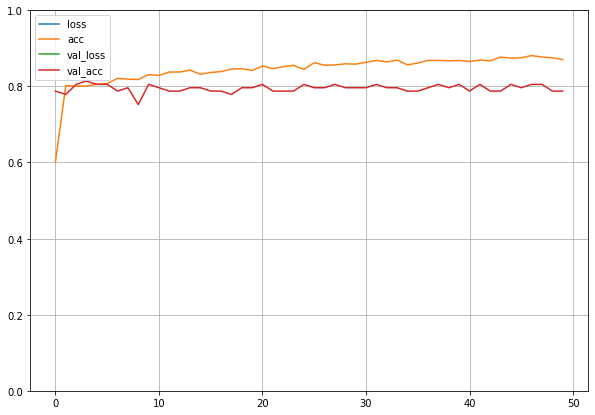

In [11]:
# neurons 512 then 256 and no dropouts  lr_class = -5 with regularization 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [12]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 10.1786 - acc: 0.8000


[10.178627967834473, 0.800000011920929]

###test 11

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 0.6811 - acc: 0.5726
Epoch 00001: val_acc improved from -inf to 0.73451, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 9ms/step - loss: 0.6513 - acc: 0.6087 - val_loss: 0.5461 - val_acc: 0.7345
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5022 - acc: 0.7860
Epoch 00002: val_acc improved from 0.73451 to 0.79646, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4927 - acc: 0.7896 - val_loss: 0.4940 - val_acc: 0.7965
Epoch 3/50
38/51 [=====================>........] - ETA: 0s - loss: 0.4791 - acc: 0.7987
Epoch 00003: val_acc improved from 0.79646 to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.4667 - acc: 0.8

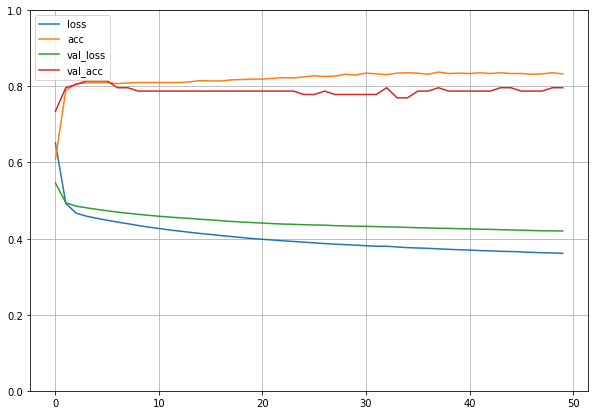

In [14]:
# neurons 512 then 256 and no dropouts  lr_class = -6
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [15]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.5187 - acc: 0.8000


[0.5187181234359741, 0.800000011920929]

## Axial Abnormal

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6851 - acc: 0.6755
Epoch 00001: val_acc improved from -inf to 0.79646, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 16ms/step - loss: 0.6742 - acc: 0.6814 - val_loss: 0.4675 - val_acc: 0.7965
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 0.4433 - acc: 0.7885
Epoch 00002: val_acc did not improve from 0.79646
51/51 [==============================] - 0s 6ms/step - loss: 0.4364 - acc: 0.7935 - val_loss: 0.4537 - val_acc: 0.7788
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4146 - acc: 0.7965
Epoch 00003: val_acc did not improve from 0.79646
51/51 [==============================] - 0s 5ms/step - loss: 0.4146 - acc: 0.7965 - val_loss: 0.4442 - val_acc: 0.7876
Epoch 4/50
39/51 [=====================>........] - ETA: 0s - loss: 0.3931 - acc: 0.8090
Epoch 00004: val_acc improved from 0.79646 to 0.8

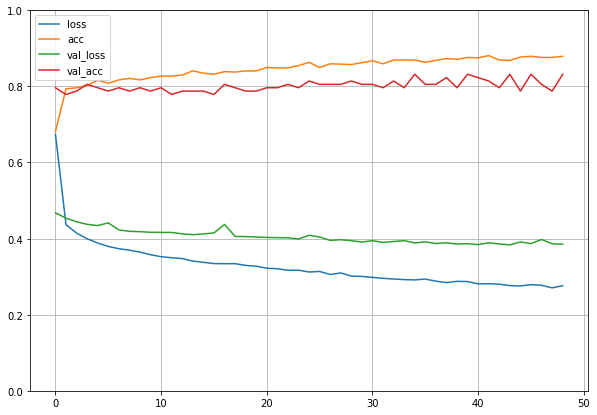

In [18]:
# neurons 512 then 256 and no dropouts  lr_class = -5 
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.abnormal )

In [22]:
processing.test_classifier(extractor_dense , processing.load_model(processing.densenet,processing.axial,processing.abnormal,processing.classifier ) ,processing.axial , processing.abnormal )

4/4 [==============================] - 0s 3ms/step - loss: 0.4526 - acc: 0.8167


[0.45257866382598877, 0.8166666626930237]

## Axial Acl

Epoch 1/50
38/51 [=====================>........] - ETA: 0s - loss: 0.9948 - acc: 0.5605
Epoch 00001: val_acc improved from -inf to 0.85841, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_acl.h5
51/51 [==============================] - 0s 10ms/step - loss: 0.8632 - acc: 0.6224 - val_loss: 0.4124 - val_acc: 0.8584
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4984 - acc: 0.8000
Epoch 00002: val_acc improved from 0.85841 to 0.87611, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_acl.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.4997 - acc: 0.7955 - val_loss: 0.4143 - val_acc: 0.8761
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.4845 - acc: 0.7990
Epoch 00003: val_acc did not improve from 0.87611
51/51 [==============================] - 0s 5ms/step - loss: 0.4849 - acc: 0.7984 - val_loss: 0.4100 - val_acc: 0.8673
Epoch 4/50
42/51 [=======================>......] - ETA: 0

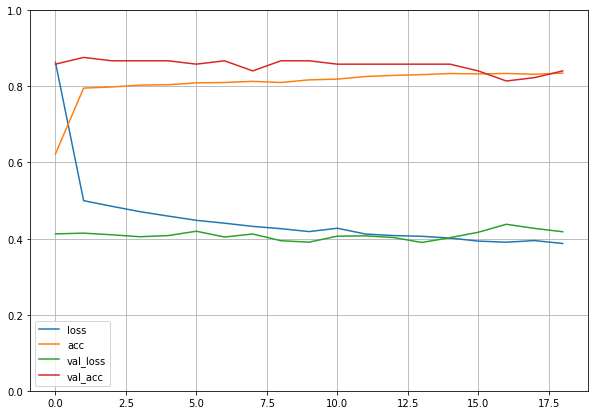

In [20]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.acl )

In [21]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.axial,processing.acl,processing.classifier ) ,processing.axial , processing.acl)

4/4 [==============================] - 0s 3ms/step - loss: 0.6571 - acc: 0.6500


[0.657085120677948, 0.6499999761581421]

## Axial Meniscal

Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 1.0214 - acc: 0.5500
Epoch 00001: val_acc improved from -inf to 0.71681, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 9ms/step - loss: 1.0036 - acc: 0.5477 - val_loss: 0.6636 - val_acc: 0.7168
Epoch 2/50
39/51 [=====================>........] - ETA: 0s - loss: 0.6674 - acc: 0.6295
Epoch 00002: val_acc did not improve from 0.71681
51/51 [==============================] - 0s 5ms/step - loss: 0.6642 - acc: 0.6303 - val_loss: 0.6476 - val_acc: 0.7080
Epoch 3/50
40/51 [======================>.......] - ETA: 0s - loss: 0.6514 - acc: 0.6562
Epoch 00003: val_acc did not improve from 0.71681
51/51 [==============================] - 0s 5ms/step - loss: 0.6426 - acc: 0.6578 - val_loss: 0.6358 - val_acc: 0.6903
Epoch 4/50
46/51 [==========================>...] - ETA: 0s - loss: 0.6389 - acc: 0.6467
Epoch 00004: val_acc did not improve from 0.71681


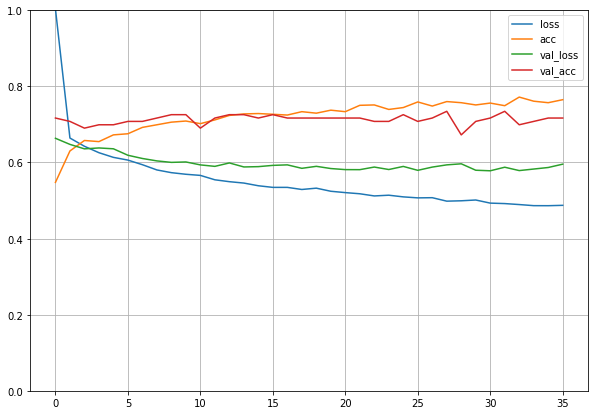

In [23]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.axial , processing.meniscal )

In [24]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.axial,processing.meniscal,processing.classifier ) ,processing.axial , processing.meniscal)

4/4 [==============================] - 0s 5ms/step - loss: 0.6484 - acc: 0.6417


[0.6484196782112122, 0.6416666507720947]

## Saggital Abnormal

Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 0.6656 - acc: 0.7917
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 10ms/step - loss: 0.6666 - acc: 0.7876 - val_loss: 0.5292 - val_acc: 0.8053
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 0.5121 - acc: 0.7987
Epoch 00002: val_acc improved from 0.80531 to 0.81416, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.5043 - acc: 0.7965 - val_loss: 0.4792 - val_acc: 0.8142
Epoch 3/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4486 - acc: 0.8085
Epoch 00003: val_acc did not improve from 0.81416
51/51 [==============================] - 0s 6ms/step - loss: 0.4448 - acc: 0.8102 - val_loss: 0.4579 - val_acc: 0.8053
Epoch 4/50
40/51 [======================>.

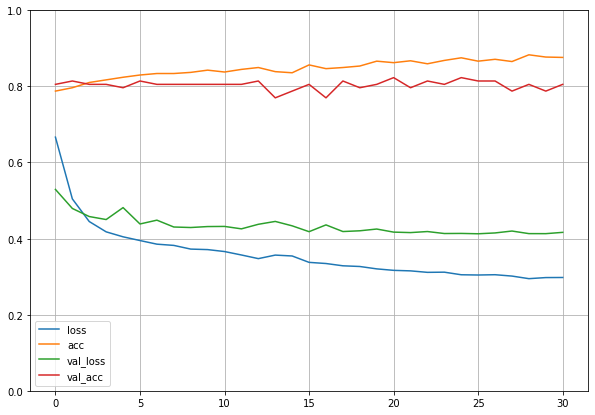

In [25]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.sagittal , processing.abnormal )

In [26]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.sagittal,processing.abnormal,processing.classifier ) ,processing.sagittal , processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4200 - acc: 0.8250


[0.41999301314353943, 0.824999988079071]

## Saggital Acl

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 0.9446 - acc: 0.6256
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/sagittal_acl.h5
51/51 [==============================] - 0s 9ms/step - loss: 0.8630 - acc: 0.6647 - val_loss: 0.4928 - val_acc: 0.8496
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 0.5443 - acc: 0.8000
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.5431 - acc: 0.8004 - val_loss: 0.4572 - val_acc: 0.8319
Epoch 3/50
40/51 [======================>.......] - ETA: 0s - loss: 0.5040 - acc: 0.8138
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.5040 - acc: 0.8083 - val_loss: 0.4359 - val_acc: 0.8496
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4871 - acc: 0.8012
Epoch 00004: val_acc did not improve from 0.84956
51

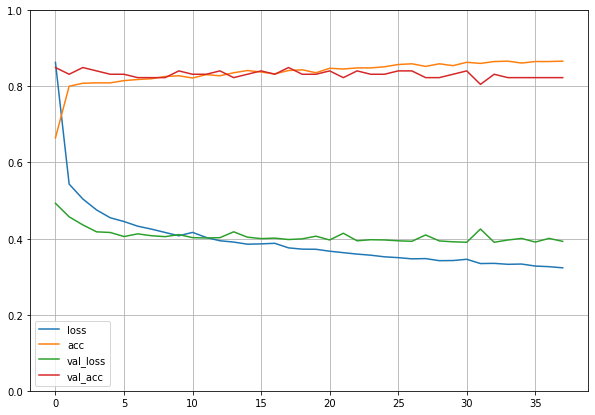

In [27]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.sagittal , processing.acl )

In [28]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.sagittal,processing.acl,processing.classifier ) ,processing.sagittal , processing.acl)

4/4 [==============================] - 0s 4ms/step - loss: 1.0424 - acc: 0.5333


[1.0424038171768188, 0.5333333611488342]

## Saggital Meniscal

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 0.7593 - acc: 0.6170
Epoch 00001: val_acc improved from -inf to 0.61062, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 10ms/step - loss: 0.7459 - acc: 0.6205 - val_loss: 0.6925 - val_acc: 0.6106
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 0.6630 - acc: 0.6250
Epoch 00002: val_acc did not improve from 0.61062
51/51 [==============================] - 0s 6ms/step - loss: 0.6613 - acc: 0.6254 - val_loss: 0.6742 - val_acc: 0.5310
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 0.6321 - acc: 0.6359
Epoch 00003: val_acc improved from 0.61062 to 0.65487, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6339 - acc: 0.6332 - val_loss: 0.6421 - val_acc: 0.6549
Epoch 4/50
47/51 [========================

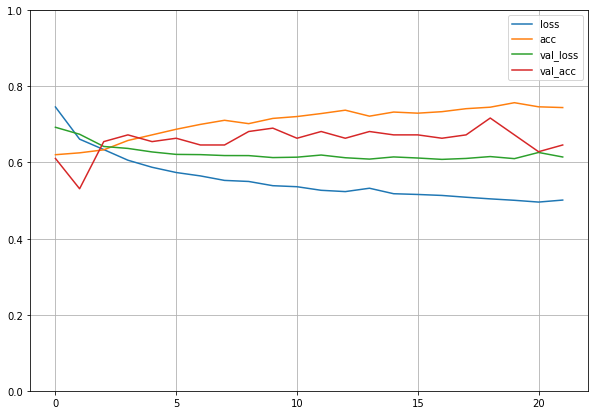

In [29]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.sagittal , processing.meniscal)

In [30]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.sagittal,processing.meniscal,processing.classifier ) ,processing.sagittal , processing.meniscal)

4/4 [==============================] - 0s 4ms/step - loss: 0.6905 - acc: 0.6500


[0.6904876828193665, 0.6499999761581421]

## Coronal Abnormal

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 0.6110 - acc: 0.7402
Epoch 00001: val_acc improved from -inf to 0.78761, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 10ms/step - loss: 0.6048 - acc: 0.7463 - val_loss: 0.4918 - val_acc: 0.7876
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4884 - acc: 0.7904
Epoch 00002: val_acc improved from 0.78761 to 0.81416, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.5020 - acc: 0.7886 - val_loss: 0.4720 - val_acc: 0.8142
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.4712 - acc: 0.7932
Epoch 00003: val_acc improved from 0.81416 to 0.82301, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.4644 - a

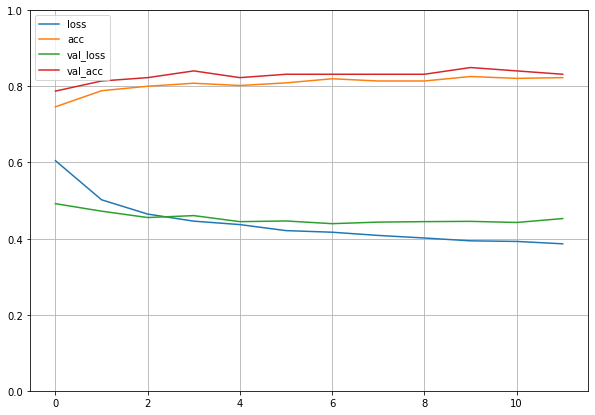

In [31]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.coronal , processing.abnormal )

In [32]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.coronal,processing.abnormal,processing.classifier ) ,processing.coronal , processing.abnormal)

4/4 [==============================] - 0s 7ms/step - loss: 0.4968 - acc: 0.8250


[0.4968205690383911, 0.824999988079071]

## Coronal Acl

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 1.1494 - acc: 0.5979
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 10ms/step - loss: 1.0992 - acc: 0.6136 - val_loss: 0.4876 - val_acc: 0.8496
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.5219 - acc: 0.7888
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 6ms/step - loss: 0.5190 - acc: 0.7915 - val_loss: 0.4760 - val_acc: 0.8319
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5182 - acc: 0.7942
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 6ms/step - loss: 0.5027 - acc: 0.8004 - val_loss: 0.4660 - val_acc: 0.8319
Epoch 4/50
46/51 [==========================>...] - ETA: 0s - loss: 0.4921 - acc: 0.8033
Epoch 00004: val_acc did not improve from 0.84956
51

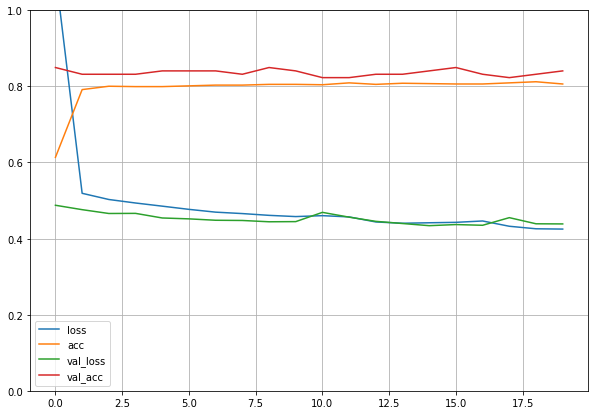

In [33]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.coronal , processing.acl )

In [34]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.coronal,processing.acl,processing.classifier ) ,processing.coronal , processing.acl)

4/4 [==============================] - 0s 5ms/step - loss: 0.9928 - acc: 0.5500


[0.9927579164505005, 0.550000011920929]

## Coronal Meniscal

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 1.0151 - acc: 0.5370
Epoch 00001: val_acc improved from -inf to 0.63717, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/coronal_meniscus.h5
51/51 [==============================] - 2s 38ms/step - loss: 1.0134 - acc: 0.5369 - val_loss: 0.6508 - val_acc: 0.6372
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 0.7057 - acc: 0.6175
Epoch 00002: val_acc improved from 0.63717 to 0.69027, saving model to /content/drive/My Drive/Models/DenseNet/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.7059 - acc: 0.6205 - val_loss: 0.6151 - val_acc: 0.6903
Epoch 3/50
47/51 [==========================>...] - ETA: 0s - loss: 0.6622 - acc: 0.6479
Epoch 00003: val_acc did not improve from 0.69027
51/51 [==============================] - 0s 6ms/step - loss: 0.6546 - acc: 0.6509 - val_loss: 0.6148 - val_acc: 0.6726
Epoch 4/50
46/51 [==========================

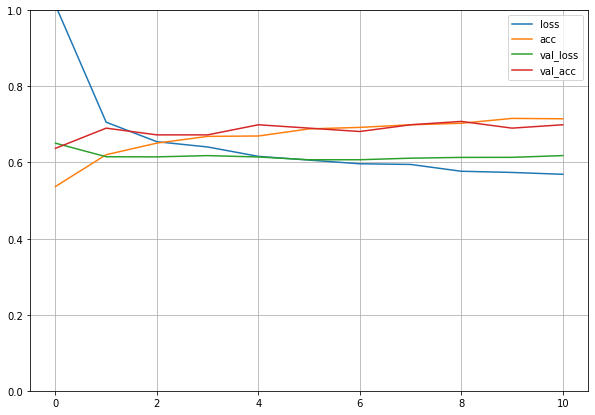

In [34]:
bin_class = binary_classifier()
processing.train_classifier(extractor_dense , bin_class , processing.densenet , processing.coronal , processing.meniscal)

In [35]:
processing.test_classifier(extractor_dense, processing.load_model(processing.densenet,processing.coronal,processing.meniscal,processing.classifier ) ,processing.coronal , processing.meniscal)

4/4 [==============================] - 0s 4ms/step - loss: 0.6988 - acc: 0.5750


[0.6987884044647217, 0.574999988079071]

#Train Regressors

##Logistic Regressor

In [0]:
def regressor():  
  log_reg = keras.models.Sequential()
  log_reg.add(keras.layers.Dense(units=1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(0.01),metrics=['acc'])
  return log_reg

###Abnormal

Epoch 1/50
38/51 [=====================>........] - ETA: 0s - loss: 0.7519 - acc: 0.4303
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/DenseNet/Regressor/abnormal.h5
51/51 [==============================] - 1s 12ms/step - loss: 0.7025 - acc: 0.5231 - val_loss: 0.5162 - val_acc: 0.8053
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4764 - acc: 0.8179
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4845 - acc: 0.8083 - val_loss: 0.4680 - val_acc: 0.8053
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 0.4559 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.4584 - acc: 0.8083 - val_loss: 0.4641 - val_acc: 0.8053
Epoch 4/50
43/51 [========================>.....] - ETA: 0s - loss: 0.4491 - acc: 0.8105
Epoch 00004: val_acc did not improve from 0.80531
51/51 

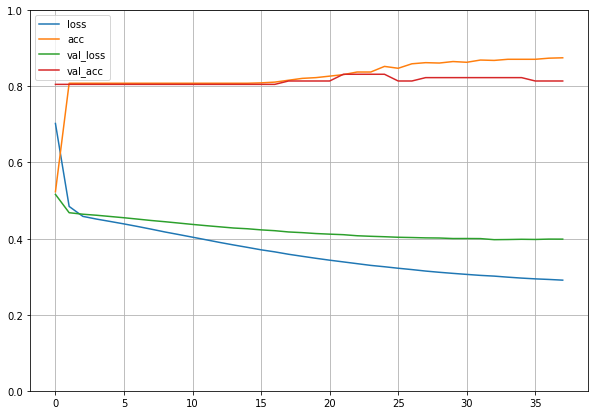

In [9]:
processing.train_regressor(regressor(),extractor_dense,extractor_dense,extractor_dense,processing.densenet,processing.abnormal)

In [10]:
processing.test_regressor(extractor_dense,extractor_dense,extractor_dense,processing.densenet,processing.abnormal)

4/4 [==============================] - 0s 4ms/step - loss: 0.4418 - acc: 0.8167


[0.4417559802532196, 0.8166666626930237]

###Acl

Epoch 1/50
41/51 [=======================>......] - ETA: 0s - loss: 0.6646 - acc: 0.6317
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/DenseNet/Regressor/acl.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.6485 - acc: 0.6667 - val_loss: 0.5513 - val_acc: 0.8496
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 0.5409 - acc: 0.8070
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.5326 - acc: 0.8122 - val_loss: 0.4731 - val_acc: 0.8496
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.4976 - acc: 0.8140
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.4995 - acc: 0.8122 - val_loss: 0.4467 - val_acc: 0.8496
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 0.4963 - acc: 0.8085
Epoch 00004: val_acc did not improve from 0.84956
51/51 [=====

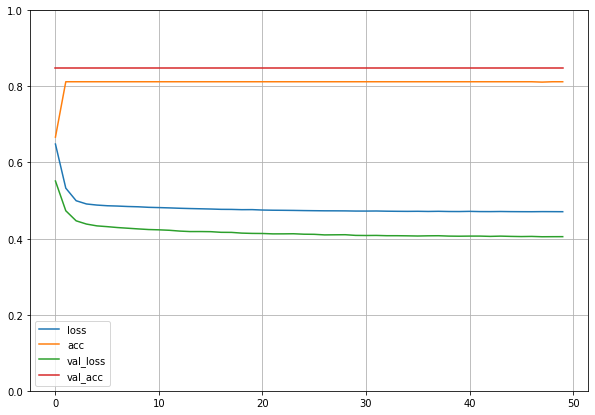

In [11]:
processing.train_regressor(regressor(),extractor_dense,extractor_dense,extractor_dense,processing.densenet,processing.acl)

In [12]:
processing.test_regressor(extractor_dense,extractor_dense,extractor_dense,processing.densenet,processing.acl)

4/4 [==============================] - 0s 4ms/step - loss: 0.6972 - acc: 0.5500


[0.6971763372421265, 0.550000011920929]

###Meniscal

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 0.6713 - acc: 0.6200
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/DenseNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.6693 - acc: 0.6234 - val_loss: 0.6554 - val_acc: 0.6637
Epoch 2/50
39/51 [=====================>........] - ETA: 0s - loss: 0.6381 - acc: 0.6756
Epoch 00002: val_acc improved from 0.66372 to 0.67257, saving model to /content/drive/My Drive/Models/DenseNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.6324 - acc: 0.6834 - val_loss: 0.6346 - val_acc: 0.6726
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 0.6041 - acc: 0.6811
Epoch 00003: val_acc improved from 0.67257 to 0.72566, saving model to /content/drive/My Drive/Models/DenseNet/Regressor/meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6050 - acc: 0.6794 - val_loss: 0.619

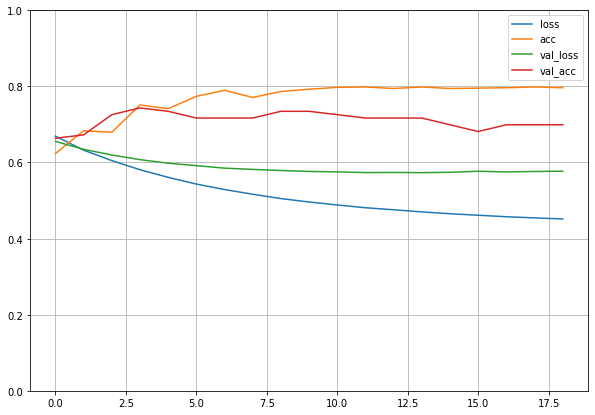

In [13]:
processing.train_regressor(regressor(),extractor_dense,extractor_dense,extractor_dense,processing.densenet,processing.meniscal)

In [14]:
processing.test_regressor(extractor_dense,extractor_dense,extractor_dense,processing.densenet,processing.meniscal)

4/4 [==============================] - 0s 4ms/step - loss: 0.6453 - acc: 0.6417


[0.6452761888504028, 0.6416666507720947]